##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE112271**

file previously downloaded:
GSE112271_RAW.tar

unzipped using 
``` bash
tar -xvf GSE112271_RAW.tar
```

This gives the following files:                         
* GSM3064818_Pt13.a_barcodes.tsv.gz
* GSM3064818_Pt13.a_genes.tsv.gz
* GSM3064818_Pt13.a_matrix.mtx.gz
* GSM3064819_Pt13.b_barcodes.tsv.gz
* GSM3064819_Pt13.b_genes.tsv.gz
* GSM3064819_Pt13.b_matrix.mtx.gz
* GSM3064820_Pt13.c_barcodes.tsv.gz
* GSM3064820_Pt13.c_genes.tsv.gz
* GSM3064820_Pt13.c_matrix.mtx.gz
* GSM3064821_Pt14.a_barcodes.tsv.gz
* GSM3064821_Pt14.a_genes.tsv.gz
* GSM3064821_Pt14.a_matrix.mtx.gz
* GSM3064822_Pt14.b_barcodes.tsv.gz
* GSM3064822_Pt14.b_genes.tsv.gz
* GSM3064822_Pt14.b_matrix.mtx.gz
* GSM3064823_Pt14.c_barcodes.tsv.gz
* GSM3064823_Pt14.c_genes.tsv.gz
* GSM3064823_Pt14.c_matrix.mtx.gz
* GSM3064824_Pt14.d_barcodes.tsv.gz
* GSM3064824_Pt14.d_genes.tsv.gz
* GSM3064824_Pt14.d_matrix.mtx.gz

Files organised in to correct folders and file names

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE112271')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE112271"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [6]:
#load all datasets
Pt13a.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt13a")
Pt13b.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt13b")
Pt13c.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt13c")
Pt14a.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt14a")
Pt14b.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt14b")
Pt14c.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt14c")
Pt14d.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE112271/Pt14d")

In [7]:
#Add dataset info to colnames
colnames(Pt13a.data) <- paste0("GSE112271_Pt13a_", colnames(Pt13a.data))
colnames(Pt13b.data) <- paste0("GSE112271_Pt13b_", colnames(Pt13b.data))
colnames(Pt13c.data) <- paste0("GSE112271_Pt13c_", colnames(Pt13c.data))
colnames(Pt14a.data) <- paste0("GSE112271_Pt14a_", colnames(Pt14a.data))
colnames(Pt14b.data) <- paste0("GSE112271_Pt14b_", colnames(Pt14b.data))
colnames(Pt14c.data) <- paste0("GSE112271_Pt14c_", colnames(Pt14c.data))
colnames(Pt14d.data) <- paste0("GSE112271_Pt14d_", colnames(Pt14d.data))

In [9]:
head(colnames(Pt14b.data))

[1] "GSE112271_Pt14b_AAACCTGAGGGCTTGA-1" "GSE112271_Pt14b_AAACCTGTCATGCATG-1"
[3] "GSE112271_Pt14b_AAACGGGCATGACGGA-1" "GSE112271_Pt14b_AAACGGGTCTTATCTG-1"
[5] "GSE112271_Pt14b_AAAGATGAGACTTGAA-1" "GSE112271_Pt14b_AAAGATGCATCCTAGA-1"

In [11]:
#create seperate seurat object for each sample
Pt13a <- CreateSeuratObject(counts = Pt13a.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt13a@meta.data$sample_type <- "tumour"
Pt13a@meta.data$cancer_type <- "HCC"
Pt13a@meta.data$patient_id <- "Pt13"
Pt13a@meta.data$sample_id <- "GSE112271_HCC_Pt13_region-a"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [12]:
#Repeat for remaining samples

#create seperate seurat object for each sample
Pt13b <- CreateSeuratObject(counts = Pt13b.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt13b@meta.data$sample_type <- "tumour"
Pt13b@meta.data$cancer_type <- "HCC"
Pt13b@meta.data$patient_id <- "Pt13"
Pt13b@meta.data$sample_id <- "GSE112271_HCC_Pt13_region-b"

#create seperate seurat object for each sample
Pt13c <- CreateSeuratObject(counts = Pt13c.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt13c@meta.data$sample_type <- "tumour"
Pt13c@meta.data$cancer_type <- "HCC"
Pt13c@meta.data$patient_id <- "Pt13"
Pt13c@meta.data$sample_id <- "GSE112271_HCC_Pt13_region-c"

#create seperate seurat object for each sample
Pt14a <- CreateSeuratObject(counts = Pt14a.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt14a@meta.data$sample_type <- "tumour"
Pt14a@meta.data$cancer_type <- "HCC"
Pt14a@meta.data$patient_id <- "Pt14"
Pt14a@meta.data$sample_id <- "GSE112271_HCC_Pt14_region-a"

#create seperate seurat object for each sample
Pt14b <- CreateSeuratObject(counts = Pt14b.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt14b@meta.data$sample_type <- "tumour"
Pt14b@meta.data$cancer_type <- "HCC"
Pt14b@meta.data$patient_id <- "Pt14"
Pt14b@meta.data$sample_id <- "GSE112271_HCC_Pt14_region-b"

#create seperate seurat object for each sample
Pt14c <- CreateSeuratObject(counts = Pt14c.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt14c@meta.data$sample_type <- "tumour"
Pt14c@meta.data$cancer_type <- "HCC"
Pt14c@meta.data$patient_id <- "Pt14"
Pt14c@meta.data$sample_id <- "GSE112271_HCC_Pt14_region-c"

#create seperate seurat object for each sample
Pt14d <- CreateSeuratObject(counts = Pt14d.data, project = "GSE112271", min.features = 200)
#add metadata to sample
Pt14d@meta.data$sample_type <- "tumour"
Pt14d@meta.data$cancer_type <- "HCC"
Pt14d@meta.data$patient_id <- "Pt14"
Pt14d@meta.data$sample_id <- "GSE112271_HCC_Pt14_region-d"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [14]:
head(Pt13a@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 GSE112271  7759       1632        
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 GSE112271  5681       1867        
GSE112271_Pt13a_AAACCTGAGATATGCA-1 GSE112271  6995       1749        
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 GSE112271  5321       1472        
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 GSE112271  4501       1094        
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 GSE112271  4376       1304        
                                   sample_type cancer_type patient_id
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGATATGCA-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 tumour      HCC         Pt13      
                                   sample_id                  
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGATATGCA-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 GSE112271_HCC_Pt13_region-a

In [15]:
#Merge seurat objects
HCC <- merge(Pt13a, y = c(Pt13b, Pt13c, Pt14a, Pt14b, Pt14c, Pt14d), project = "GSE112271")

In [16]:
HCC
head(HCC@meta.data)
tail(HCC@meta.data)

An object of class Seurat 
32738 features across 46941 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)
 7 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7

orig.ident nCount_RNA nFeature_RNA
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 GSE112271  7759       1632        
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 GSE112271  5681       1867        
GSE112271_Pt13a_AAACCTGAGATATGCA-1 GSE112271  6995       1749        
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 GSE112271  5321       1472        
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 GSE112271  4501       1094        
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 GSE112271  4376       1304        
                                   sample_type cancer_type patient_id
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGATATGCA-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 tumour      HCC         Pt13      
                                   sample_id                  
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGATATGCA-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 GSE112271_HCC_Pt13_region-a
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 GSE112271_HCC_Pt13_region-a

orig.ident nCount_RNA nFeature_RNA
GSE112271_Pt14d_TTTGTCAGTCCAACTA-1 GSE112271  12546      3079        
GSE112271_Pt14d_TTTGTCAGTCCCTACT-1 GSE112271   1691       709        
GSE112271_Pt14d_TTTGTCATCAGGTTCA-1 GSE112271   3101      1220        
GSE112271_Pt14d_TTTGTCATCCACTGGG-1 GSE112271   2103       921        
GSE112271_Pt14d_TTTGTCATCGCGCCAA-1 GSE112271   1812       751        
GSE112271_Pt14d_TTTGTCATCGCTTGTC-1 GSE112271   5925      1822        
                                   sample_type cancer_type patient_id
GSE112271_Pt14d_TTTGTCAGTCCAACTA-1 tumour      HCC         Pt14      
GSE112271_Pt14d_TTTGTCAGTCCCTACT-1 tumour      HCC         Pt14      
GSE112271_Pt14d_TTTGTCATCAGGTTCA-1 tumour      HCC         Pt14      
GSE112271_Pt14d_TTTGTCATCCACTGGG-1 tumour      HCC         Pt14      
GSE112271_Pt14d_TTTGTCATCGCGCCAA-1 tumour      HCC         Pt14      
GSE112271_Pt14d_TTTGTCATCGCTTGTC-1 tumour      HCC         Pt14      
                                   sample_id                  
GSE112271_Pt14d_TTTGTCAGTCCAACTA-1 GSE112271_HCC_Pt14_region-d
GSE112271_Pt14d_TTTGTCAGTCCCTACT-1 GSE112271_HCC_Pt14_region-d
GSE112271_Pt14d_TTTGTCATCAGGTTCA-1 GSE112271_HCC_Pt14_region-d
GSE112271_Pt14d_TTTGTCATCCACTGGG-1 GSE112271_HCC_Pt14_region-d
GSE112271_Pt14d_TTTGTCATCGCGCCAA-1 GSE112271_HCC_Pt14_region-d
GSE112271_Pt14d_TTTGTCATCGCTTGTC-1 GSE112271_HCC_Pt14_region-d

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


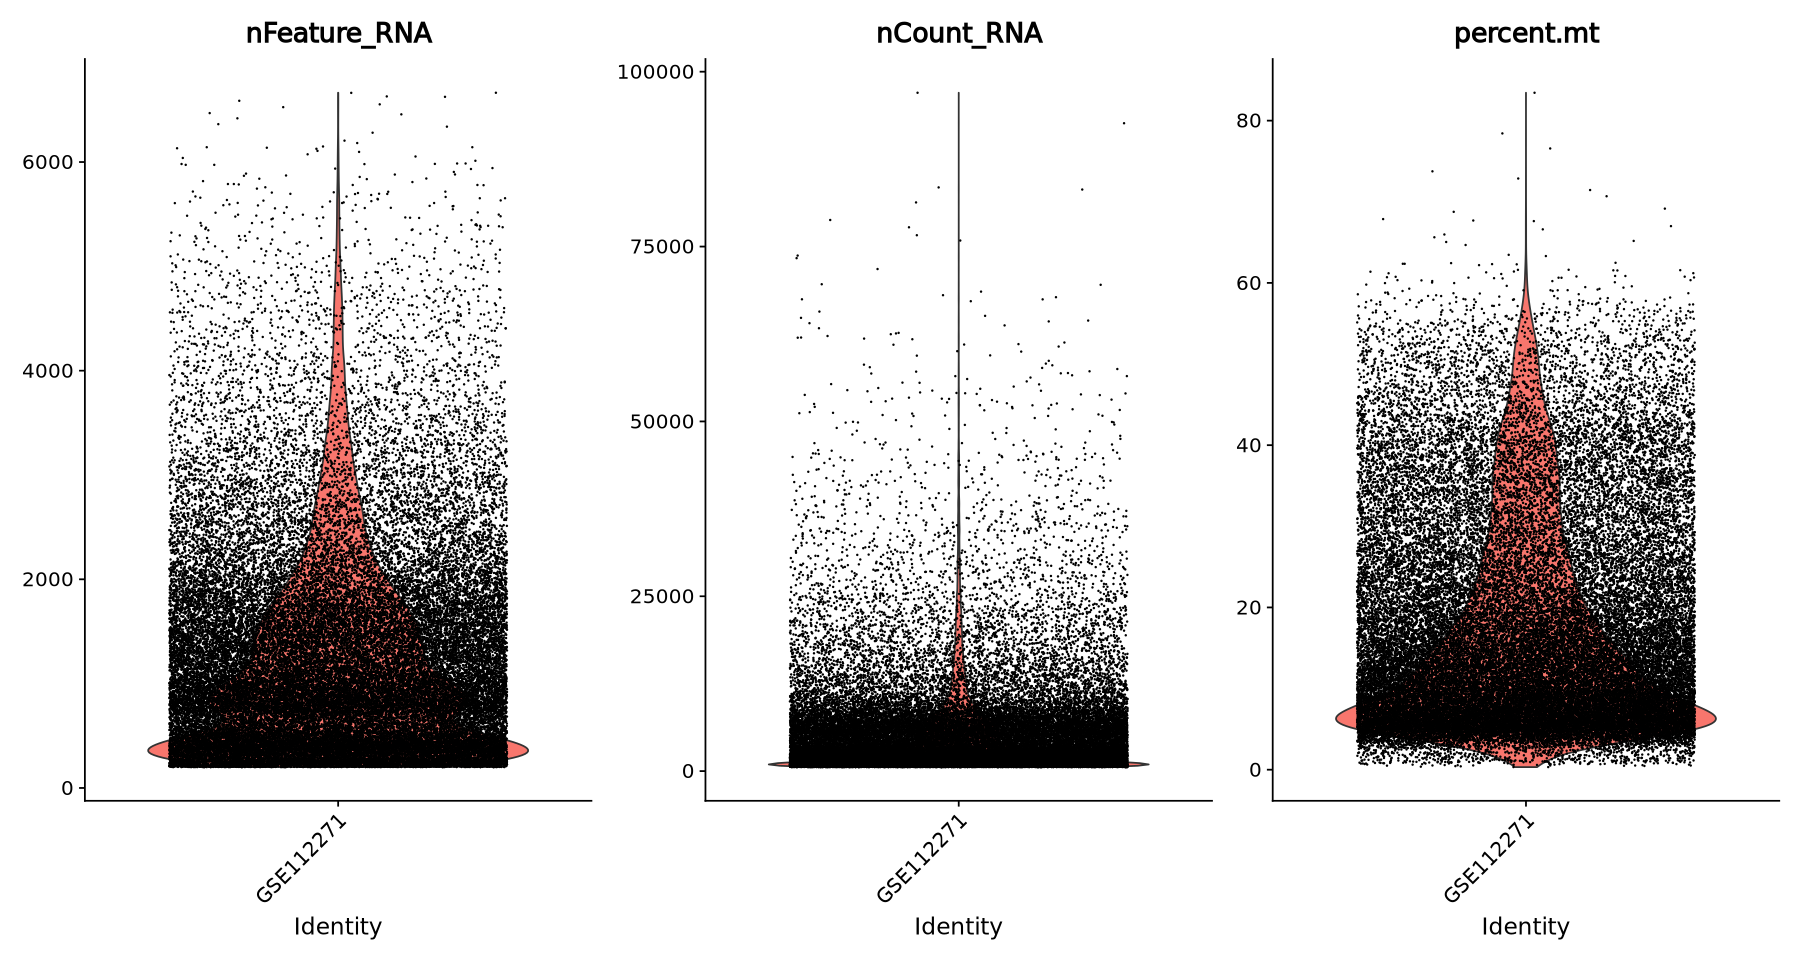

In [17]:
#QC Steps 
HCC[["percent.mt"]] <- PercentageFeatureSet(HCC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HCC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [18]:
#Normalise the data
HCC <- NormalizeData(HCC)
#Find variable features
HCC <- FindVariableFeatures(HCC, selection.method = "vst", nfeatures = 2000)
#Scale the data
HCC <- ScaleData(HCC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
HCC <- RunPCA(HCC, features = VariableFeatures(object = HCC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  APOA2, ALB, RBP4, APOC1, TTR, APOH, HULC, MGST1, AMBP, SERPINA1 
	   HP, APOC3, EPHX1, GSTA2, FGG, GSTA1, FGA, DDT, ORM1, FGL1 
	   APOE, APOA1, FTL, APCS, SERPINC1, FGB, HPX, CFHR1, APOM, CYB5A 
Negative:  VIM, TMSB4X, IGFBP7, SPARC, CD9, TCF4, IFI27, GNG11, S100A11, MEF2C 
	   MARCKS, FOSB, S100A6, CAV1, GSN, SEPW1, JUNB, MGP, ID3, GSTP1 
	   SPARCL1, TIMP1, PTRF, COL4A1, CD74, 

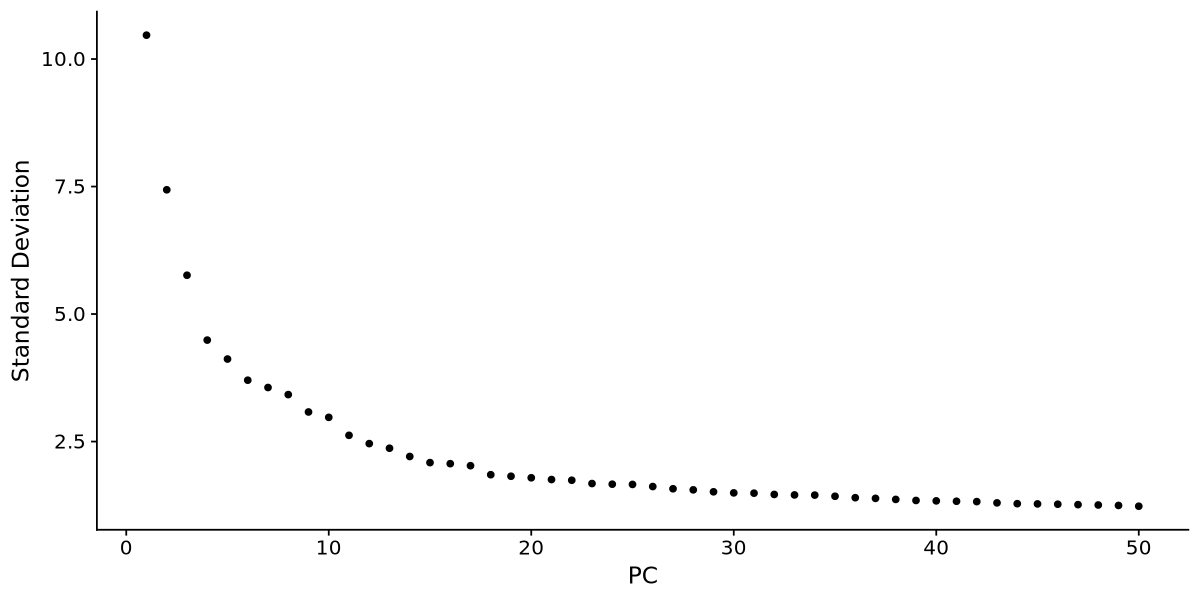

In [19]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HCC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [20]:
#Find neighbours (make sure number matches no. features chosen above)
HCC <- FindNeighbors(HCC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [21]:
#Run UMAP
HCC <- RunUMAP(HCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


12:24:42 UMAP embedding parameters a = 0.9922 b = 1.112

12:24:42 Read 46941 rows and found 40 numeric columns

12:24:42 Using Annoy for neighbor search, n_neighbors = 30

12:24:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:24:46 Writing NN index file to temp file /scratch/temp/9321733/RtmpoHhnuR/file2d811e4b5baf16

12:24:46 Searching Annoy index using 1 thread, search_k = 3000

12:25:01 Annoy recall = 100%

12:25:02 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:25:04 Initializing from normalized Laplacian + noise (using RSpectra)

12:25:06 Commencing optimization for 200 epochs, with 2134738 positive edges

12:25:26 Optimization finished



In [22]:
#Cluster, resolution here set to 0.2
HCC <- FindClusters(HCC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 46941
Number of edges: 1737728

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9663
Number of communities: 18
Elapsed time: 16 seconds


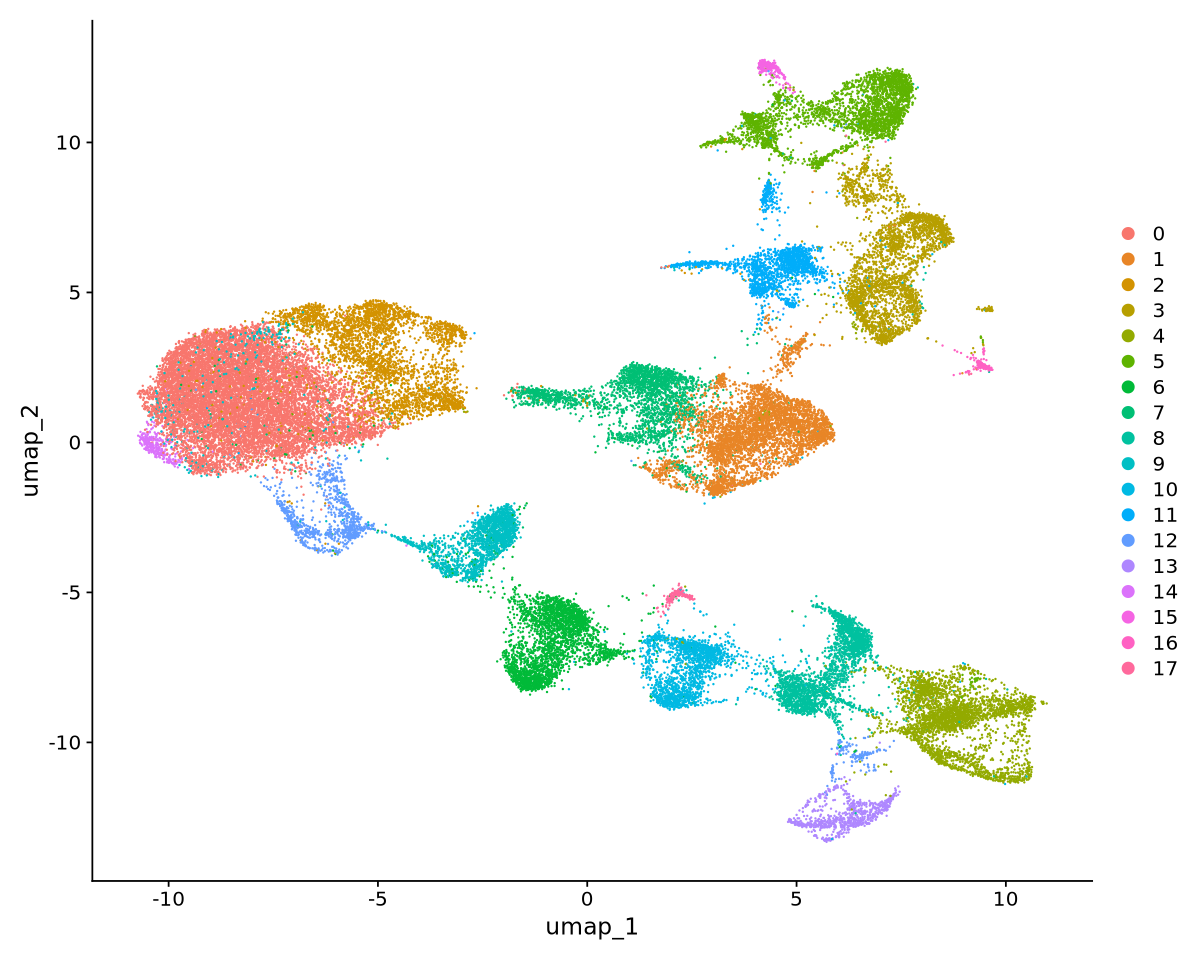

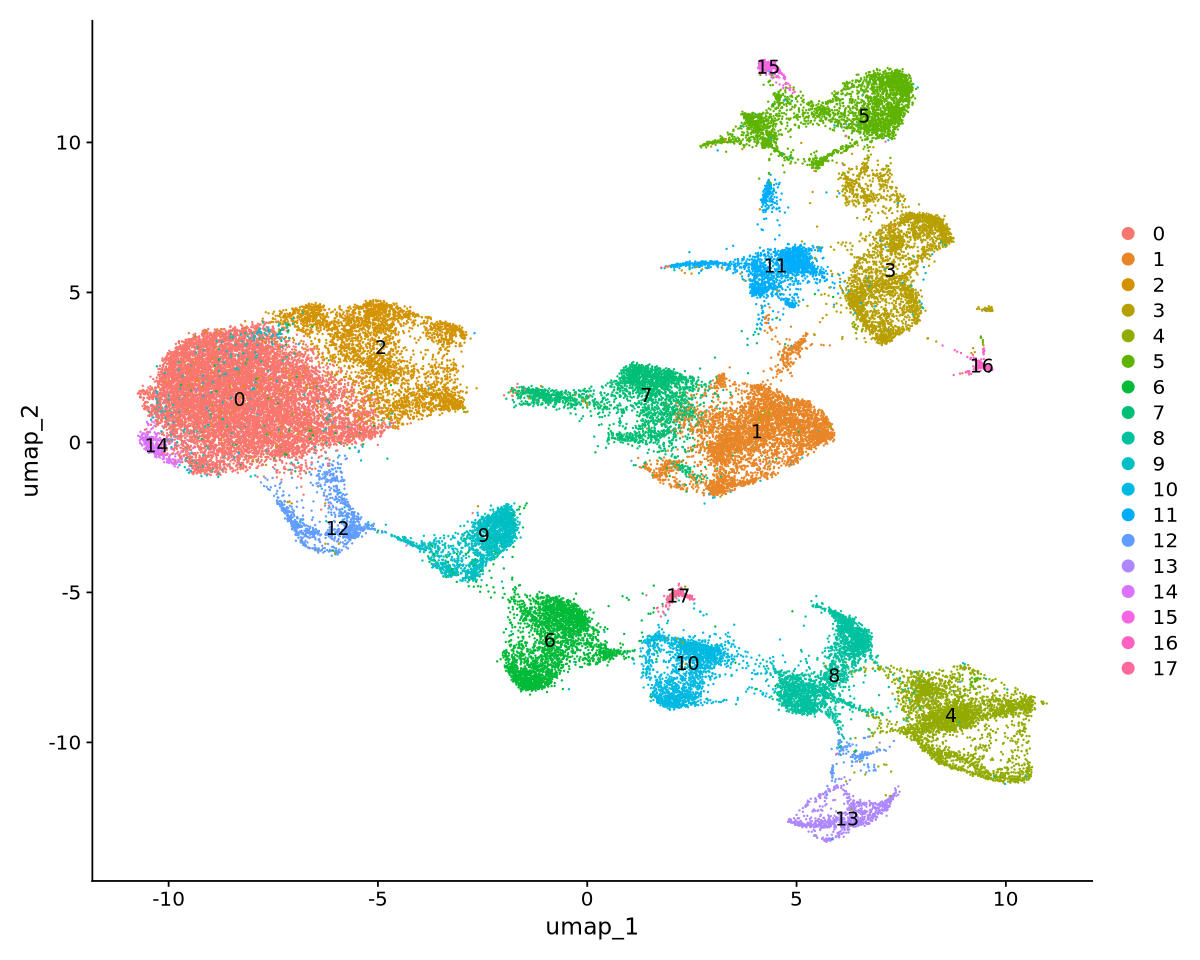

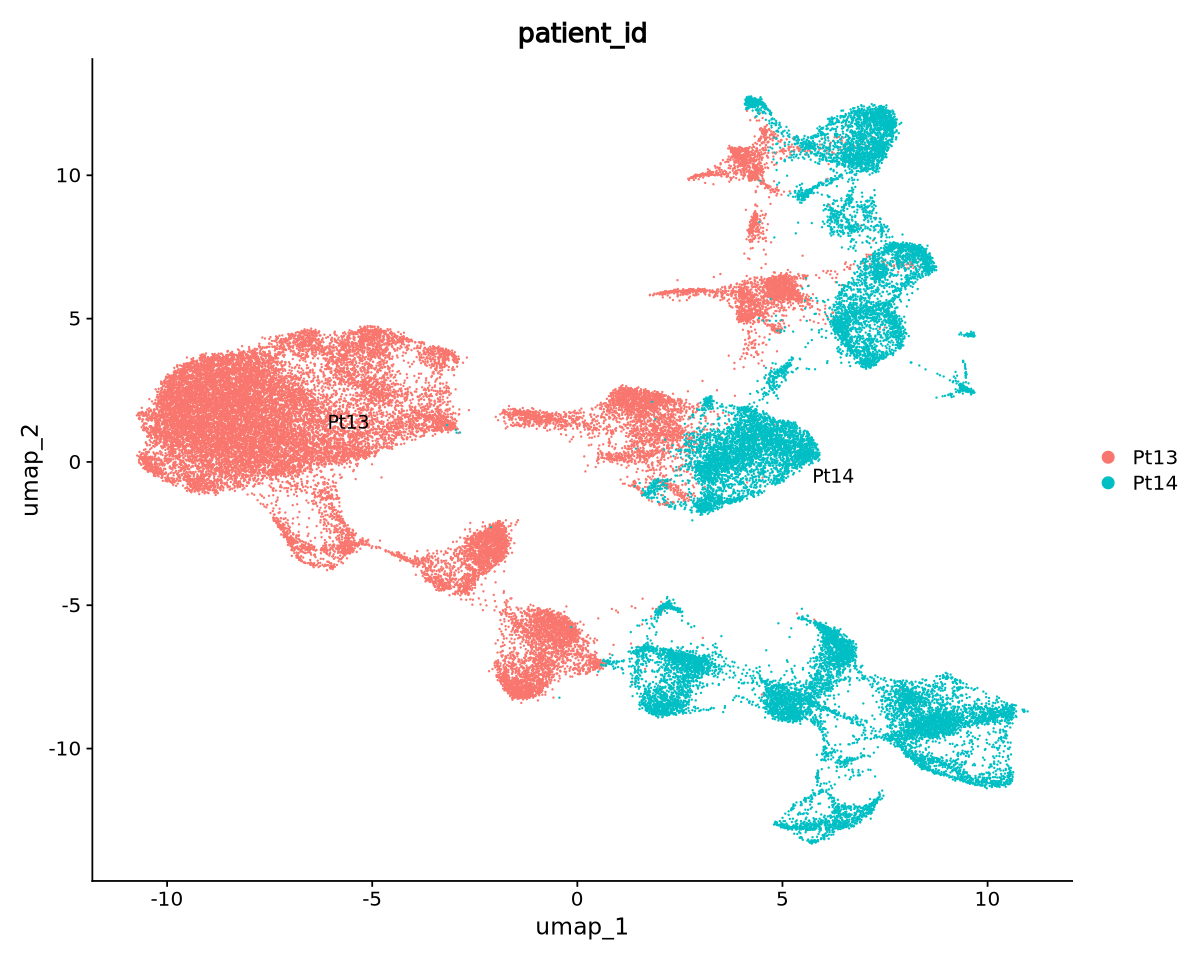

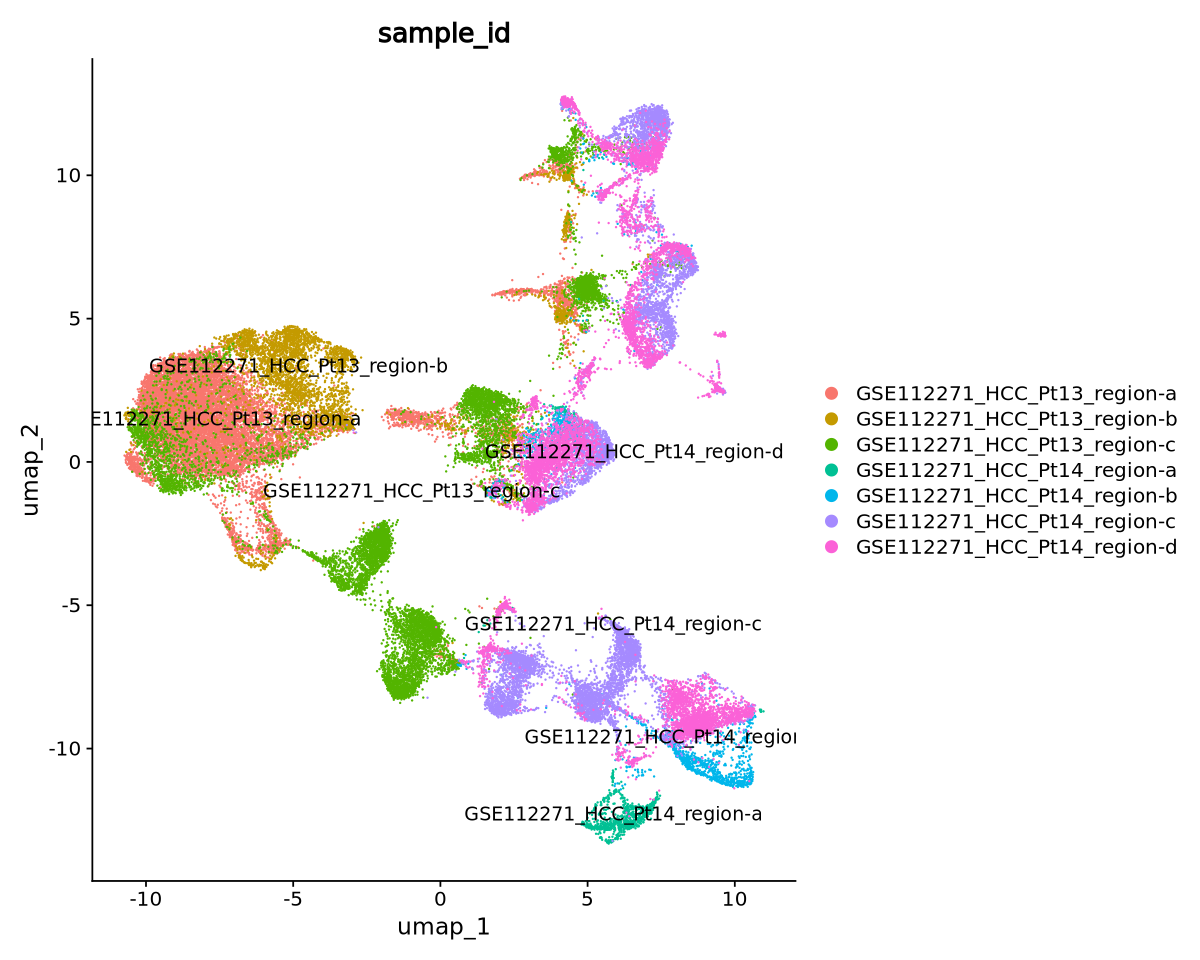

In [23]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(HCC, reduction = "umap")
DimPlot(HCC, reduction = "umap", label=TRUE)
DimPlot(HCC, reduction = "umap", label=TRUE, group = "patient_id")
DimPlot(HCC, reduction = "umap", label=TRUE, group = "sample_id")

#### From above can see data is seperating by patients. Need to keep that in mind below

In [24]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HCC, file = "/scratch/user/s4436039/scdata/GSE112271/GSE112271.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

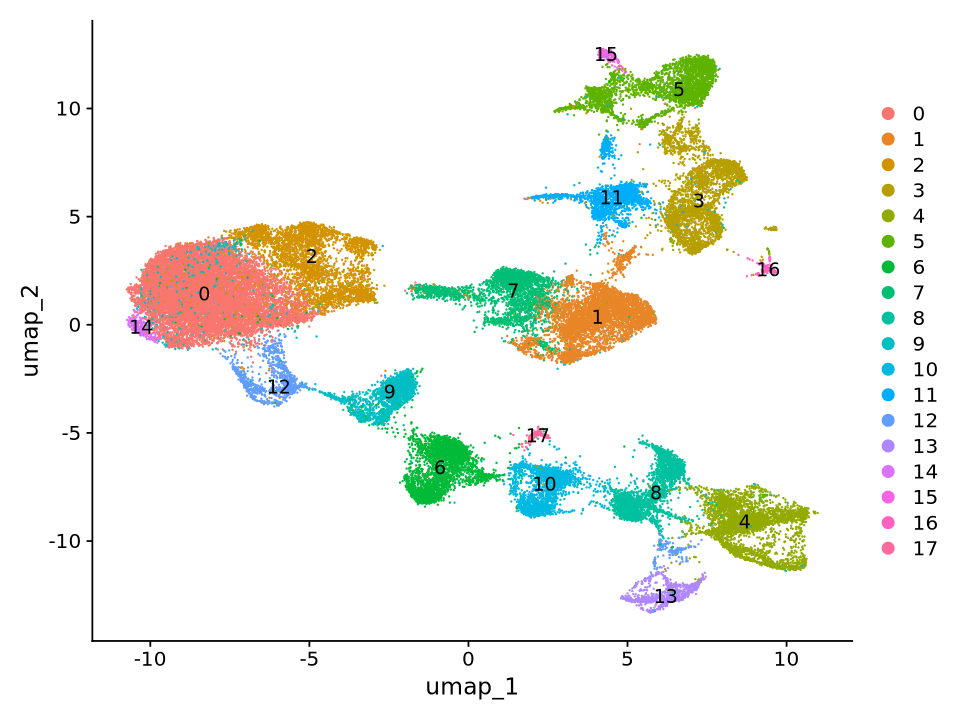

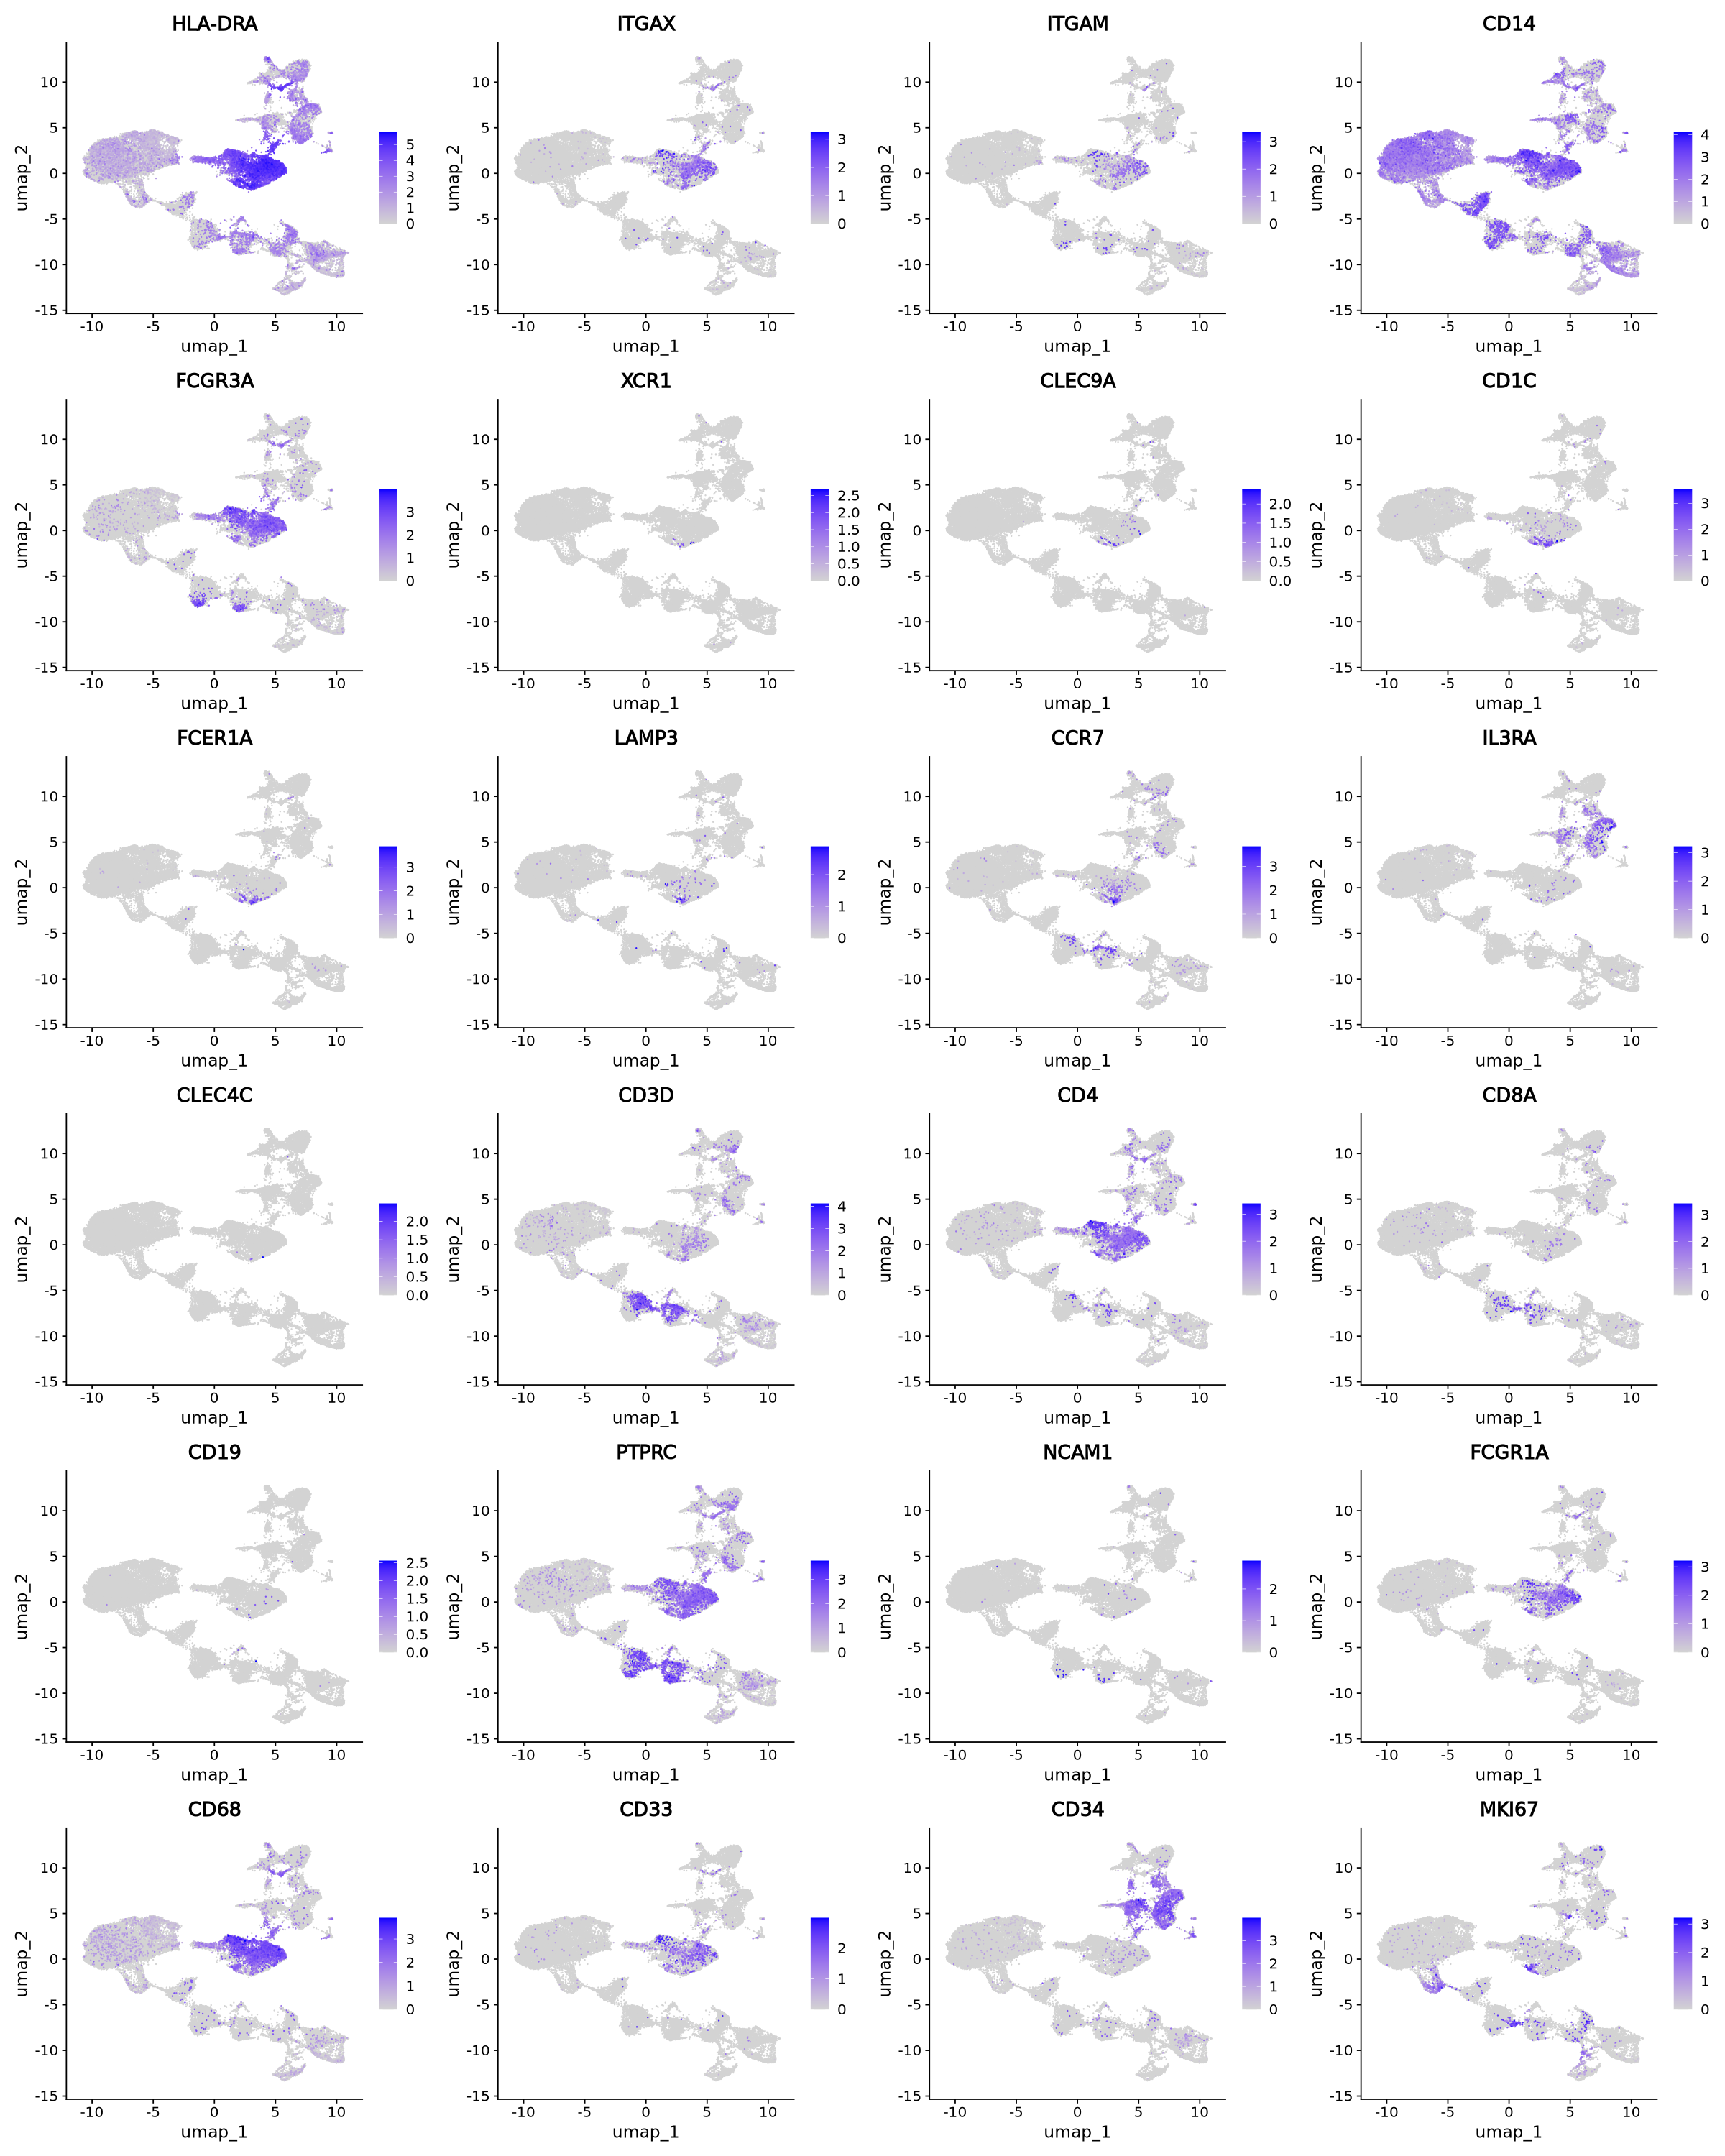

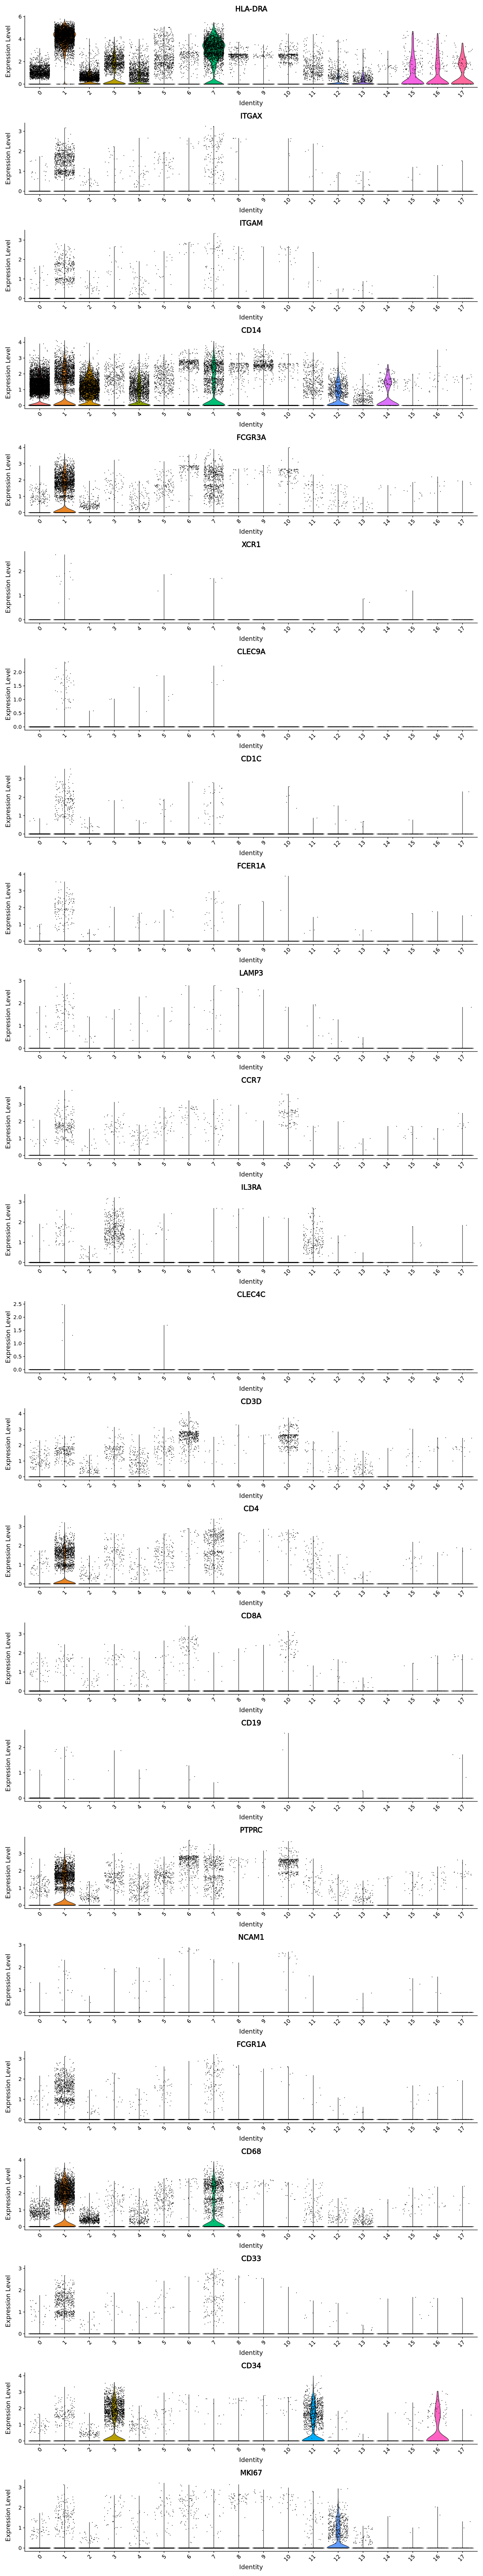

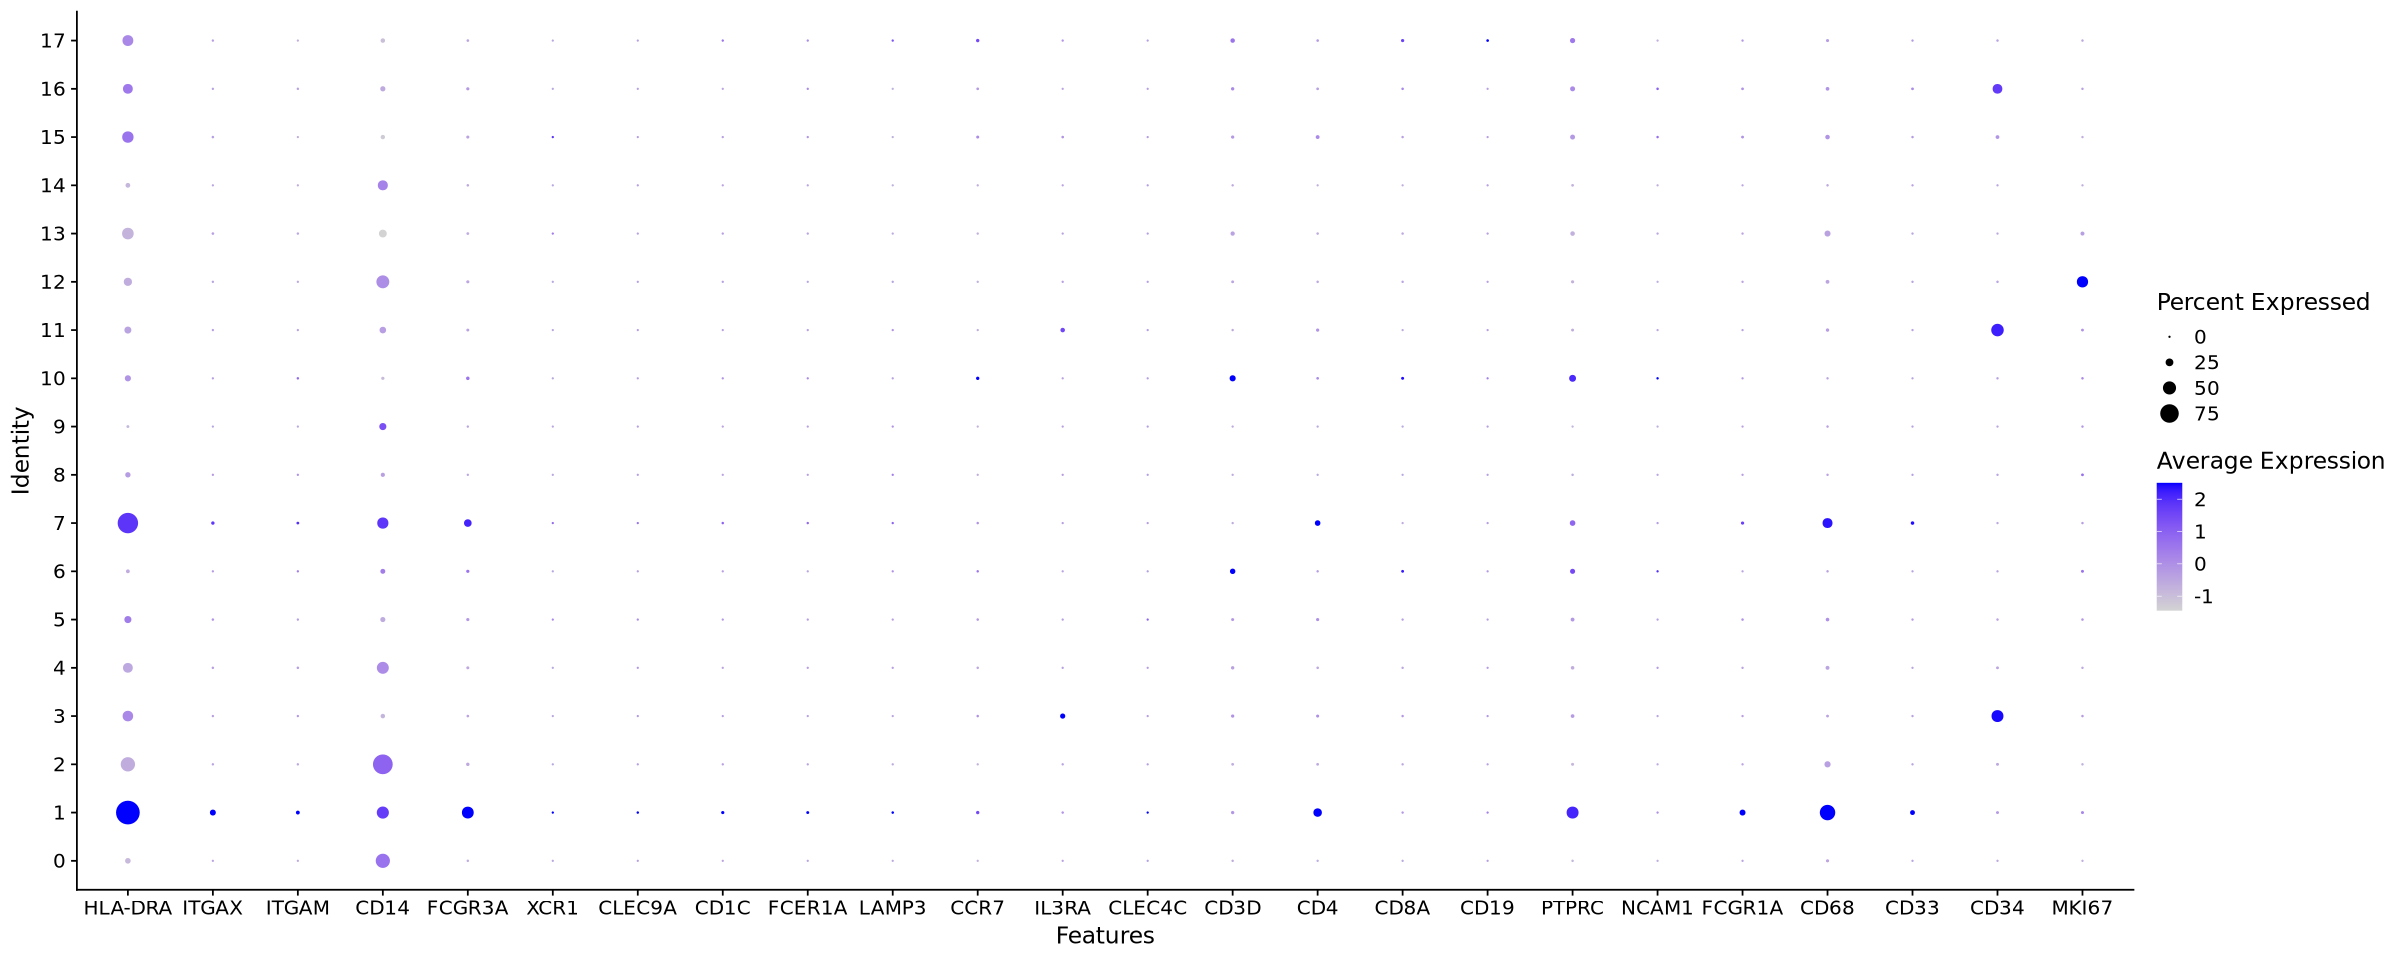

In [25]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(HCC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(HCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(HCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(HCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like clusters 1 and 7 are the myeloid cells, now subsetting out these clusters

In [26]:
head(HCC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 GSE112271  7759       1632        
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 GSE112271  5681       1867        
GSE112271_Pt13a_AAACCTGAGATATGCA-1 GSE112271  6995       1749        
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 GSE112271  5321       1472        
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 GSE112271  4501       1094        
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 GSE112271  4376       1304        
                                   sample_type cancer_type patient_id
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGATATGCA-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 tumour      HCC         Pt13      
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 tumour      HCC         Pt13      
                                   sample_id                   percent.mt
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 GSE112271_HCC_Pt13_region-a  7.0885423
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 GSE112271_HCC_Pt13_region-a 13.0258757
GSE112271_Pt13a_AAACCTGAGATATGCA-1 GSE112271_HCC_Pt13_region-a 13.0950679
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 GSE112271_HCC_Pt13_region-a  9.0584477
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 GSE112271_HCC_Pt13_region-a  0.7998223
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 GSE112271_HCC_Pt13_region-a 10.2605119
                                   RNA_snn_res.0.2 seurat_clusters
GSE112271_Pt13a_AAACCTGAGACTAGGC-1 0               0              
GSE112271_Pt13a_AAACCTGAGAGGTTGC-1 0               0              
GSE112271_Pt13a_AAACCTGAGATATGCA-1 0               0              
GSE112271_Pt13a_AAACCTGAGCACCGTC-1 7               7              
GSE112271_Pt13a_AAACCTGAGGAATGGA-1 14              14             
GSE112271_Pt13a_AAACCTGAGGTGCAAC-1 0               0

In [27]:
myeloid_HCC <- subset(HCC, subset = RNA_snn_res.0.2 %in% c("1","7"))

In [28]:
myeloid_HCC

An object of class Seurat 
32738 features across 7452 samples within 1 assay 
Active assay: RNA (32738 features, 2000 variable features)
 15 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, data.1, data.2, data.3, data.4, data.5, data.6, data.7, scale.data
 2 dimensional reductions calculated: pca, umap

In [29]:
saveRDS(myeloid_HCC, "/scratch/user/s4436039/scdata/GSE112271/GSE112271_myeloid.RDS")

#### Following the above then need to move entire GSE112271 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE112271/ /QRISdata/Q5935/nikita/scdata/GSE112271
```